# **Email/SMS Spam Detection**

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [359]:
df=pd.read_csv('../Dataset/spam.csv', encoding='ISO-8859-1')

In [360]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Stages**
1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deploy

## **1. Data Cleaning**

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Drop last 3 columns

In [362]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [363]:
df.sample(5)

,v1,v2
1414,ham,So wats ur opinion abt him and how abt is char...
4841,ham,"Awesome, that gonna be soon or later tonight?"
3727,ham,The search 4 happiness is 1 of d main sources ...
5143,ham,Hi darlin im on helens fone im gonna b up the ...
238,ham,"New Theory: Argument wins d SITUATION, but los..."


#### Renaming the columns

In [364]:
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)

In [365]:
df.sample(3)

,Target,Text
3107,ham,Hello hun how ru? Its here by the way. Im good...
4873,ham,Wat happened to the cruise thing
3495,ham,Happy birthday... May u find ur prince charmin...


#### Label Encoding

In [366]:
from sklearn.preprocessing import LabelEncoder

In [367]:
encoder=LabelEncoder()

In [368]:
df['Target']=encoder.fit_transform(df['Target'])

Spam -> 1
Ham -> 0

#### Checking for missing values

In [369]:
df.isna().sum()

Target    0
Text      0
dtype: int64

#### Checking for duplicate values

In [370]:
df.duplicated().sum()

403

#### Remove Duplicate values

In [371]:
df.drop_duplicates(keep='first', inplace=True)

In [372]:
df.duplicated().sum()

0

In [373]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## **2. EDA(Exploditory Data Analysis)**

#### Analysis on Target

In [374]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1da18051d90>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

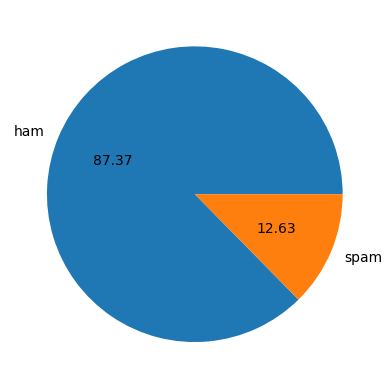

In [375]:
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct="%.2f")

Data is imbalanced

#### Analysis on Text

In [376]:
import nltk

In [377]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arupp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Number of characters**

In [378]:
df['No_of_Characters']=df['Text'].apply(len)

In [379]:
df.sample(3)

,Target,Text,No_of_Characters
979,0,Another month. I need chocolate weed and alcohol.,49
2358,0,I'll talk to the others and probably just come...,66
146,1,FreeMsg Why haven't you replied to my text? I'...,159


**Number of words**

In [380]:
nltk.download()

In [381]:
df['No_of_Words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [382]:
df.sample(3)

,Target,Text,No_of_Characters,No_of_Words
3161,0,I can't describe how lucky you are that I'm ac...,66,15
3806,0,Pls dont restrict her from eating anythin she ...,74,15
4849,0,Maybe you should find something else to do ins...,53,12


**Number of Sentences**

In [383]:
df['No_of_Sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [384]:
df.sample(3)

,Target,Text,No_of_Characters,No_of_Words,No_of_Sentences
3917,0,No need to ke qi... ÌÏ too bored izzit y sudde...,64,16,1
5410,0,"Daddy, shu shu is looking 4 u... U wan me 2 te...",82,23,1
201,0,Hello darlin ive finished college now so txt m...,84,18,1


**Analysis on number of characters, words, sentences**

In [385]:
df[['No_of_Characters', 'No_of_Words', 'No_of_Sentences']].describe()

,No_of_Characters,No_of_Words,No_of_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


**Analysis on number of characters, words, sentences (HAM)**

In [386]:
df[df['Target']==0][['No_of_Characters', 'No_of_Words', 'No_of_Sentences']].describe()

,No_of_Characters,No_of_Words,No_of_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**Analysis on number of characters, words, sentences (SPAM)**

In [387]:
df[df['Target']==1][['No_of_Characters', 'No_of_Words', 'No_of_Sentences']].describe()

,No_of_Characters,No_of_Words,No_of_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='No_of_Characters', ylabel='Count'>

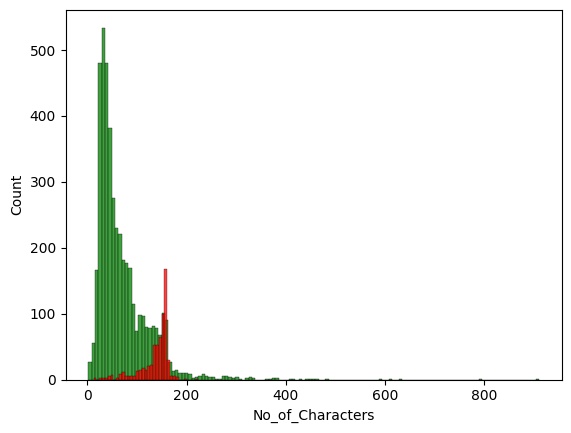

In [388]:
sns.histplot(df[df['Target']==0]['No_of_Characters'], color='green')
sns.histplot(df[df['Target']==1]['No_of_Characters'], color='red')

<Axes: xlabel='No_of_Words', ylabel='Count'>

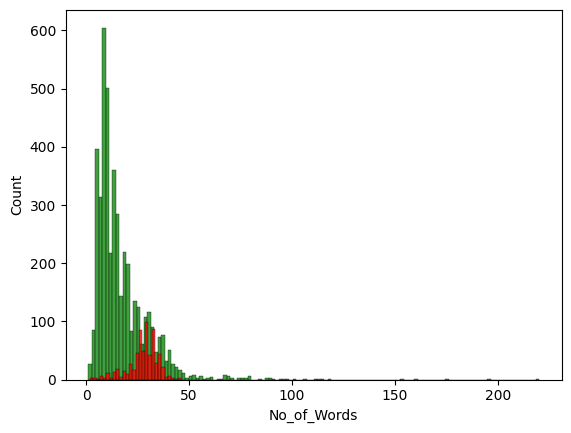

In [389]:
sns.histplot(df[df['Target']==0]['No_of_Words'], color='green')
sns.histplot(df[df['Target']==1]['No_of_Words'], color='red')

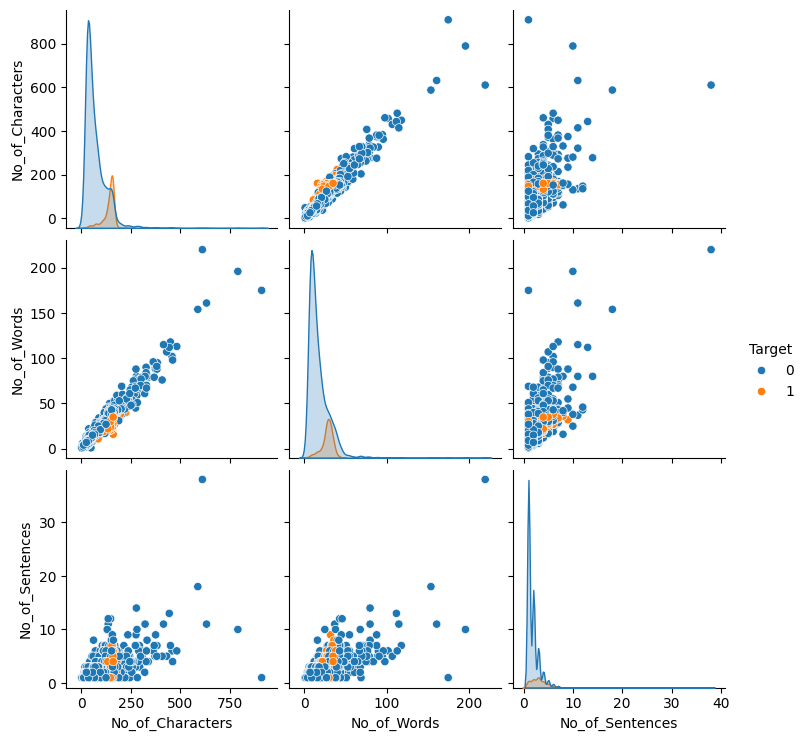

In [390]:
sns.pairplot(df, hue='Target')

<Axes: >

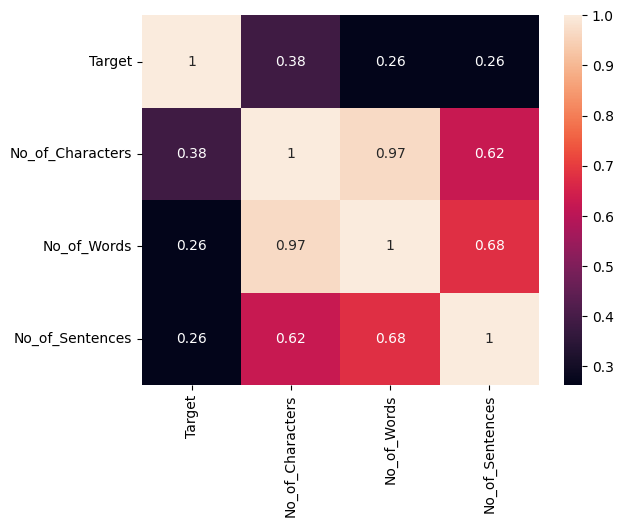

In [391]:
sns.heatmap(df[['Target', 'No_of_Characters', 'No_of_Words', 'No_of_Sentences']].corr(), annot=True)

## **3. Text Preprocessing**

- Lower Case
- Tokenization
- Removing Special Characters
- Removing Stop Words and Punctuation
- Stemming

In [392]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [393]:
def transform_text(text):
    #Convert to lower case
    lower_text=text.lower()
    #Tokenization
    tokenized_text=nltk.word_tokenize(lower_text)
    #Remove special characters
    alnum_words=list()
    for word in tokenized_text:
        if word.isalnum():
            alnum_words.append(word)
    words=list()
    #Removing Stop Words and Punctuation
    for word in alnum_words:
        if word not in stopwords.words('english') and word not in string.punctuation:
            words.append(word)
    #stemming
    ps=PorterStemmer()
    temp=list()
    for word in words:
        temp.append(ps.stem(word))
    words=temp
    return " ".join(words)

In [394]:
df['Transformed_text']=df['Text'].apply(transform_text)

In [395]:
df.sample(5)

,Target,Text,No_of_Characters,No_of_Words,No_of_Sentences,Transformed_text
4966,1,You can donate å£2.50 to UNICEF's Asian Tsunam...,137,25,1,donat unicef asian tsunami disast support fund...
2013,1,Great News! Call FREEFONE 08006344447 to claim...,120,23,3,great news call freefon 08006344447 claim guar...
4832,1,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ...",153,29,4,new mobil 2004 must go txt nokia 89545 collect...
4803,0,"Er, hello, things didnÛ÷t quite go to plan Û...",114,23,1,er hello thing quit go plan limp slowli home f...
834,0,Surely result will offer:),26,6,1,sure result offer


**Displaying the Word Cloud**

In [396]:
from wordcloud import WordCloud

In [397]:
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

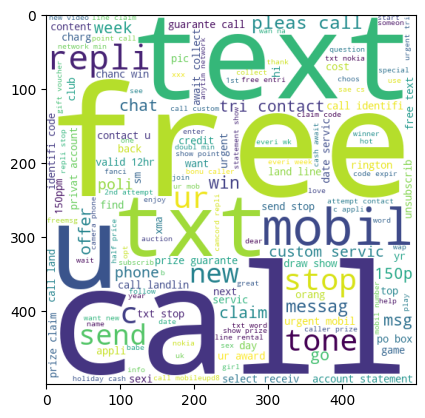

In [398]:
spam_wc=wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

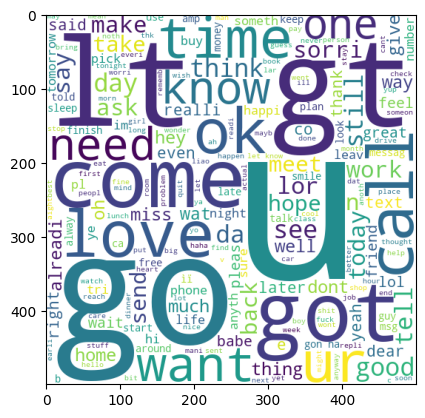

In [399]:
ham_wc=wc.generate(df[df['Target']==0]['Transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

**Get top 30 words of spam texts**

<Axes: ylabel='0'>

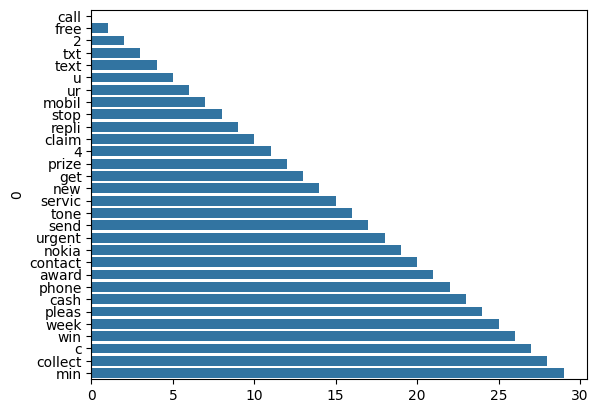

In [400]:
spam_corpus=list()
for msg in df[df['Target']==1]['Transformed_text'].tolist():
    for w in msg.split():
        spam_corpus.append(w)

from collections import Counter
df_counter=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(df_counter[0])

## **4. Model Building**

For text based data Naive bayes classifier works better 

#### **Vectorization**

In [401]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [402]:
tv=TfidfVectorizer(max_features=1000)

In [403]:
X=tv.fit_transform(df['Transformed_text']).toarray()

In [404]:
X.shape #(Msgs, words)

(5169, 1000)

In [405]:
y=df['Target'].values

In [406]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [407]:
from sklearn.model_selection import train_test_split 

In [408]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

#### **Model Training**

In [409]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [410]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [411]:
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.7804642166344294
[[680 209]
 [ 18 127]]
0.37797619047619047


In [412]:
mnb.fit(X_train, y_train)
y_pred_mnb=mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9738878143133463
[[885   4]
 [ 23 122]]
0.9682539682539683


In [413]:
bnb.fit(X_train, y_train)
y_pred_bnb=bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.97678916827853
[[883   6]
 [ 18 127]]
0.9548872180451128


In [414]:
import pickle as pk

In [416]:
pk.dump(tv, open('../Pickle_files/vectorizer.pkl', 'wb'))
pk.dump(mnb, open('../Pickle_files/model.pkl', 'wb'))